**Seaborn library is very useful for statistical plots - distributions of data and visualizing relationships .
It is again a wrapper over matplotlib 
that makes it fast, convenient to draw complex plots . It also has styles to beautify plots.**

## Seaborn
- Styles  
- Complex plots  
  - Distribution plots 
  - jointplots , hexbinolots, 2d kde plots
  - pairplot like scattermatrix in pd.plotting. 
  - violin plots, swarm plots serve well for observing a continuous var within categories of
    a **Categorical variable**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib notebook

###### Draw two histograms on same plot  using matplotlib

In [28]:
np.random.seed(321)
x = pd.Series(np.random.normal(0,10,1000), name = 'v1')
y = pd.Series(2*x + np.random.normal(60,15, 1000), name = 'v2')

In [34]:
sns.set_style('white')

<IPython.core.display.Javascript object>


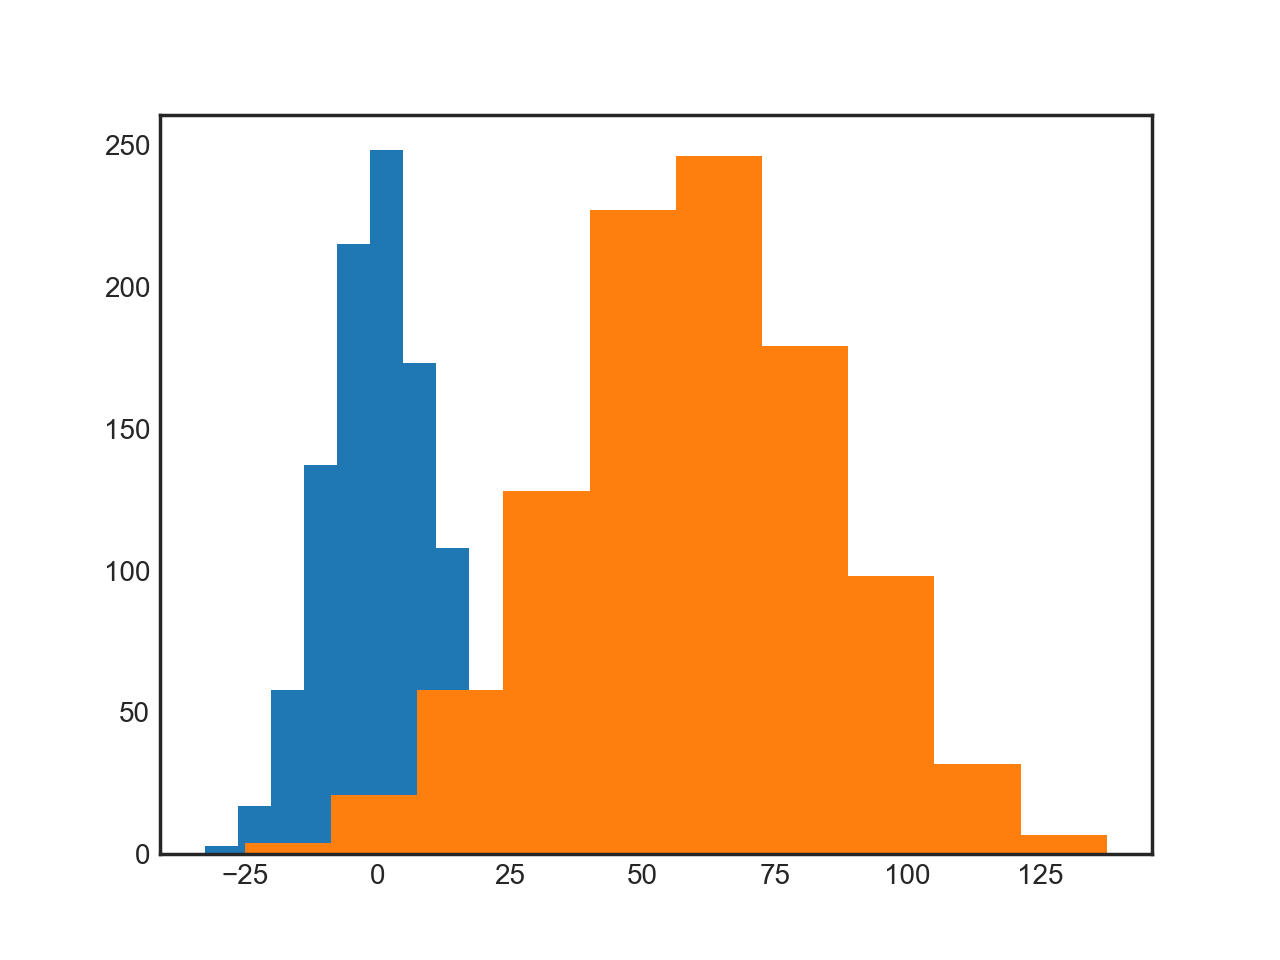

In [35]:
plt.figure()
_ = plt.hist(x)
_ = plt.hist(y)

#### To see them side by side with equal binsm we can specify bins to be constructred from a sequence

In [37]:
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>


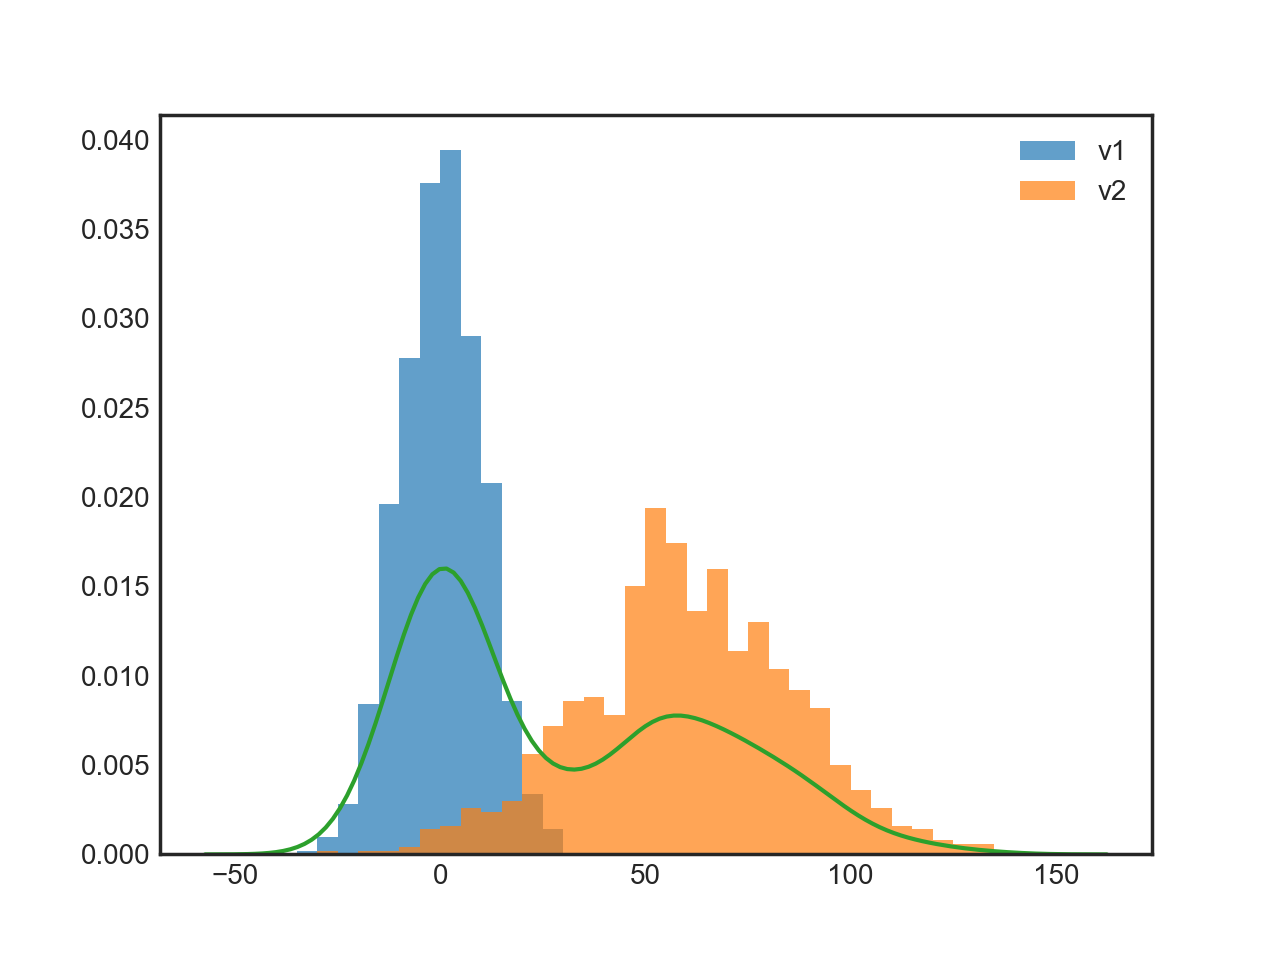

In [148]:
plt.figure()
_ = plt.hist(x, bins = np.arange(-50,150,5), alpha = 0.7, label = 'v1', normed = True)
_ = plt.hist(y, bins = np.arange(-50,150,5), alpha = 0.7, label = 'v2', normed = True)
sns.kdeplot(np.concatenate((x,y)))
plt.legend()

### Visuallizing histograms in seaborn differently 
-  with kernel density plots  
- you can see invidual distributions, and approximate distribution by joining these sequences

<IPython.core.display.Javascript object>


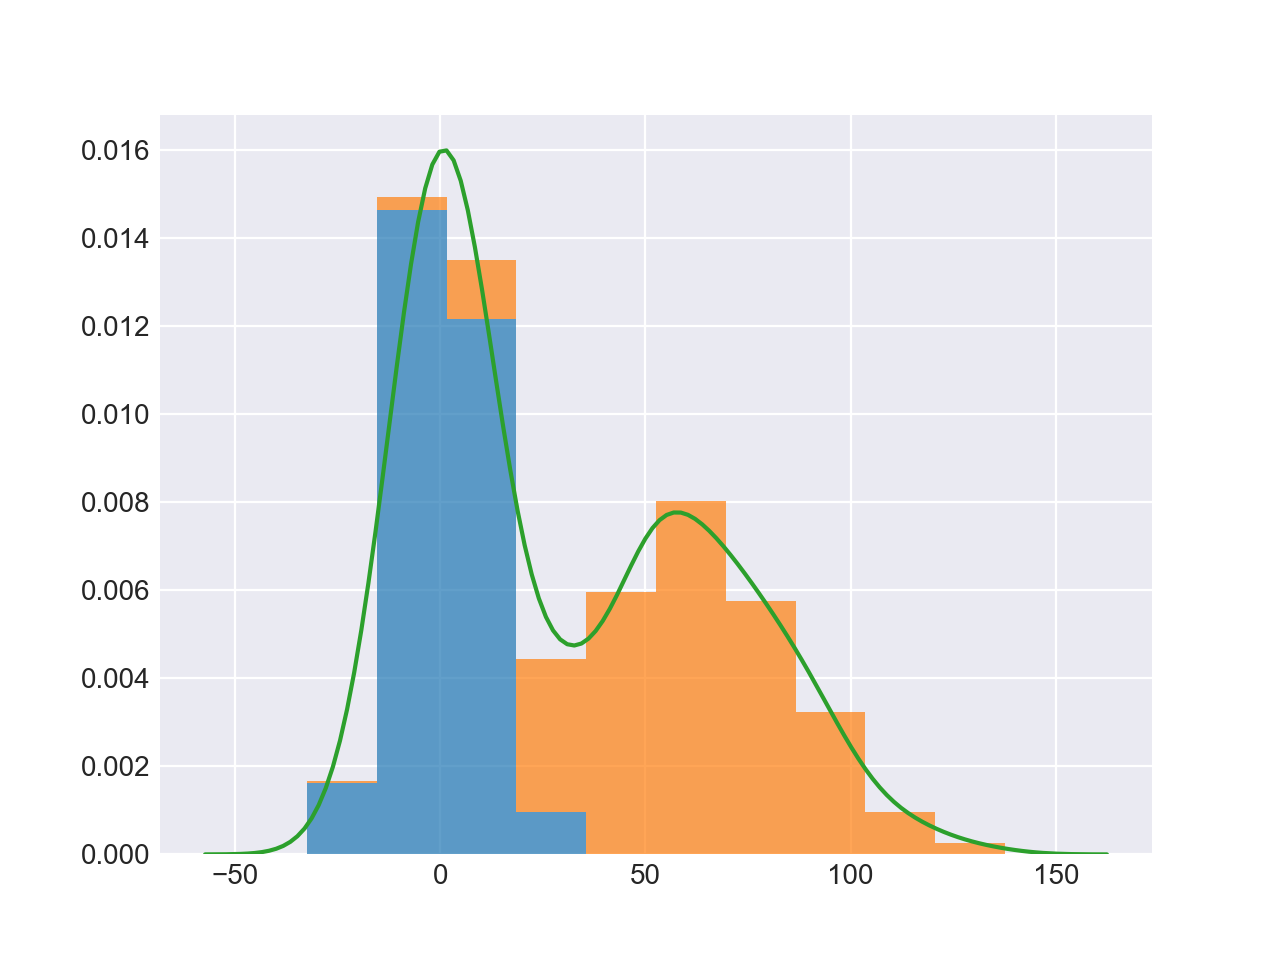

In [56]:
plt.figure()
plt.hist([x,y], alpha = 0.7, histtype= 'barstacked', normed = True)
z = np.concatenate((x,y))
kd = sns.kdeplot(z)

#### Effect of adding these two normal distributions 

<IPython.core.display.Javascript object>


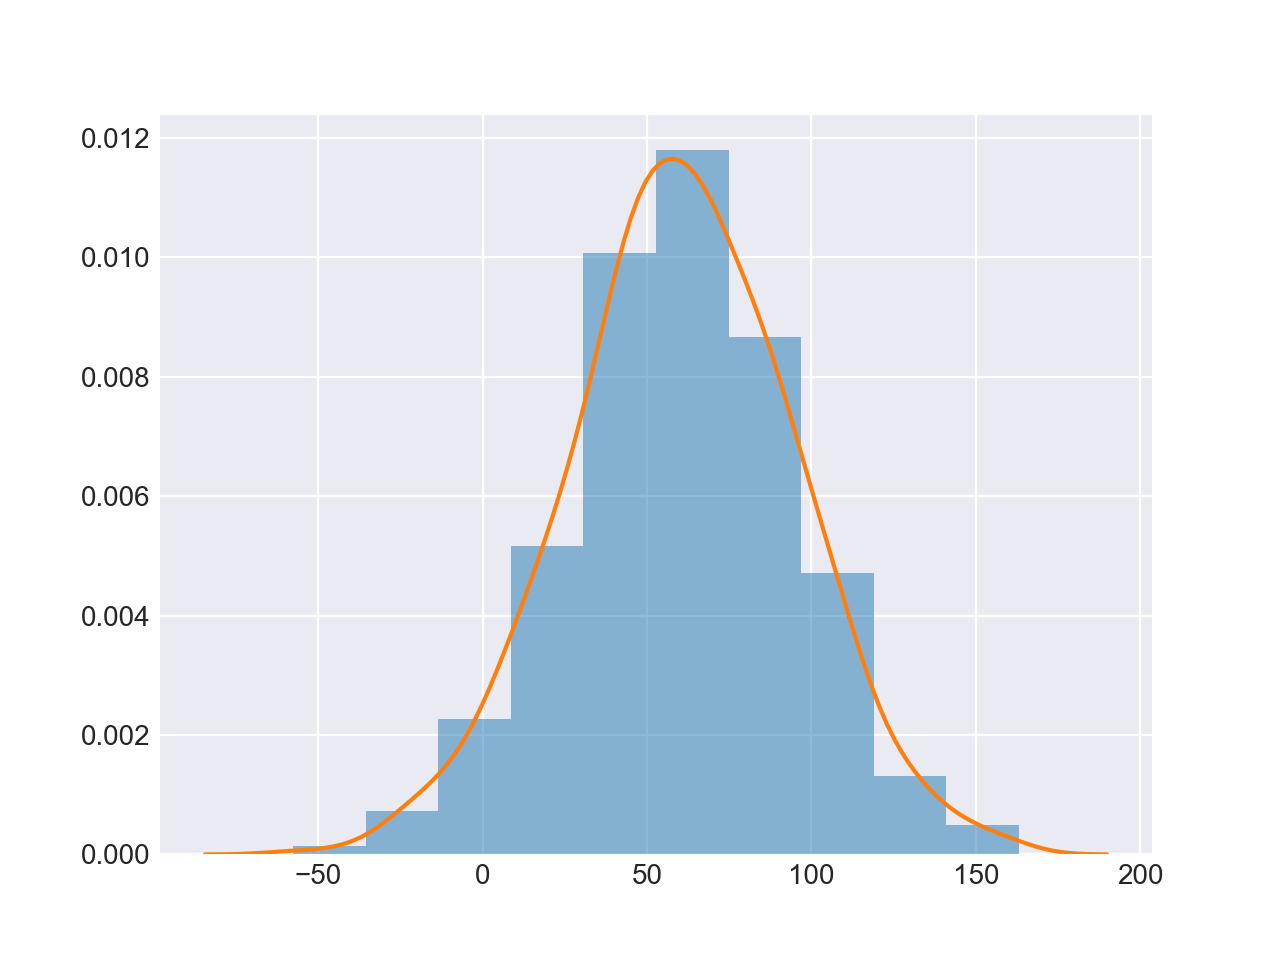

In [62]:
plt.figure()
_ = plt.hist(x+y, normed = True, alpha = 0.5)
_ = sns.kdeplot(x+y)

### sns.distplot

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data

<IPython.core.display.Javascript object>


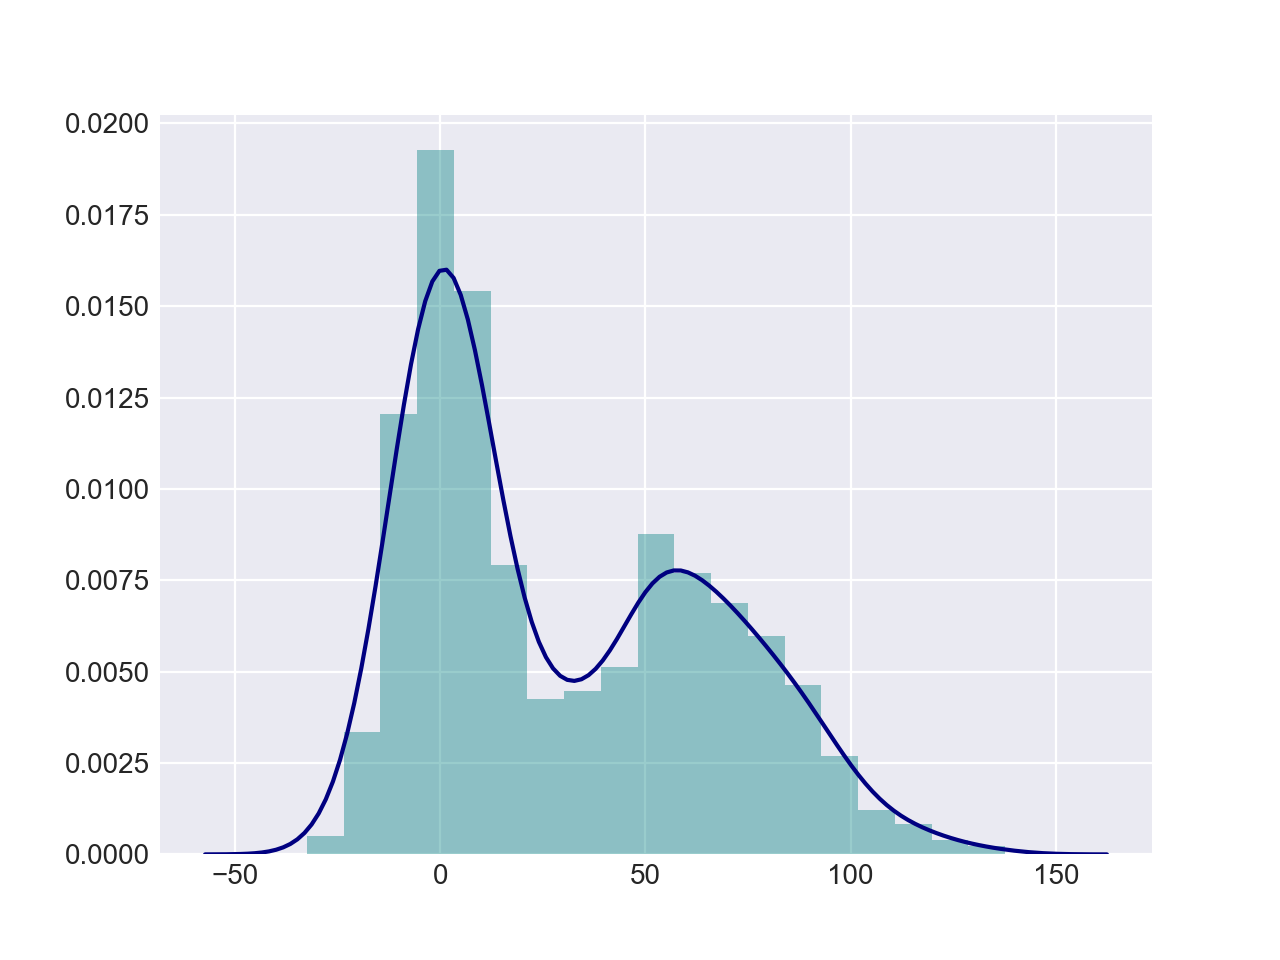

In [72]:
plt.figure()
sns.distplot(z,hist_kws= {'color' : 'Teal'}, kde_kws= {'color' : 'Navy' })

### sns.jointplot  
- univariate distribution and bivariate scatterplots 

<IPython.core.display.Javascript object>


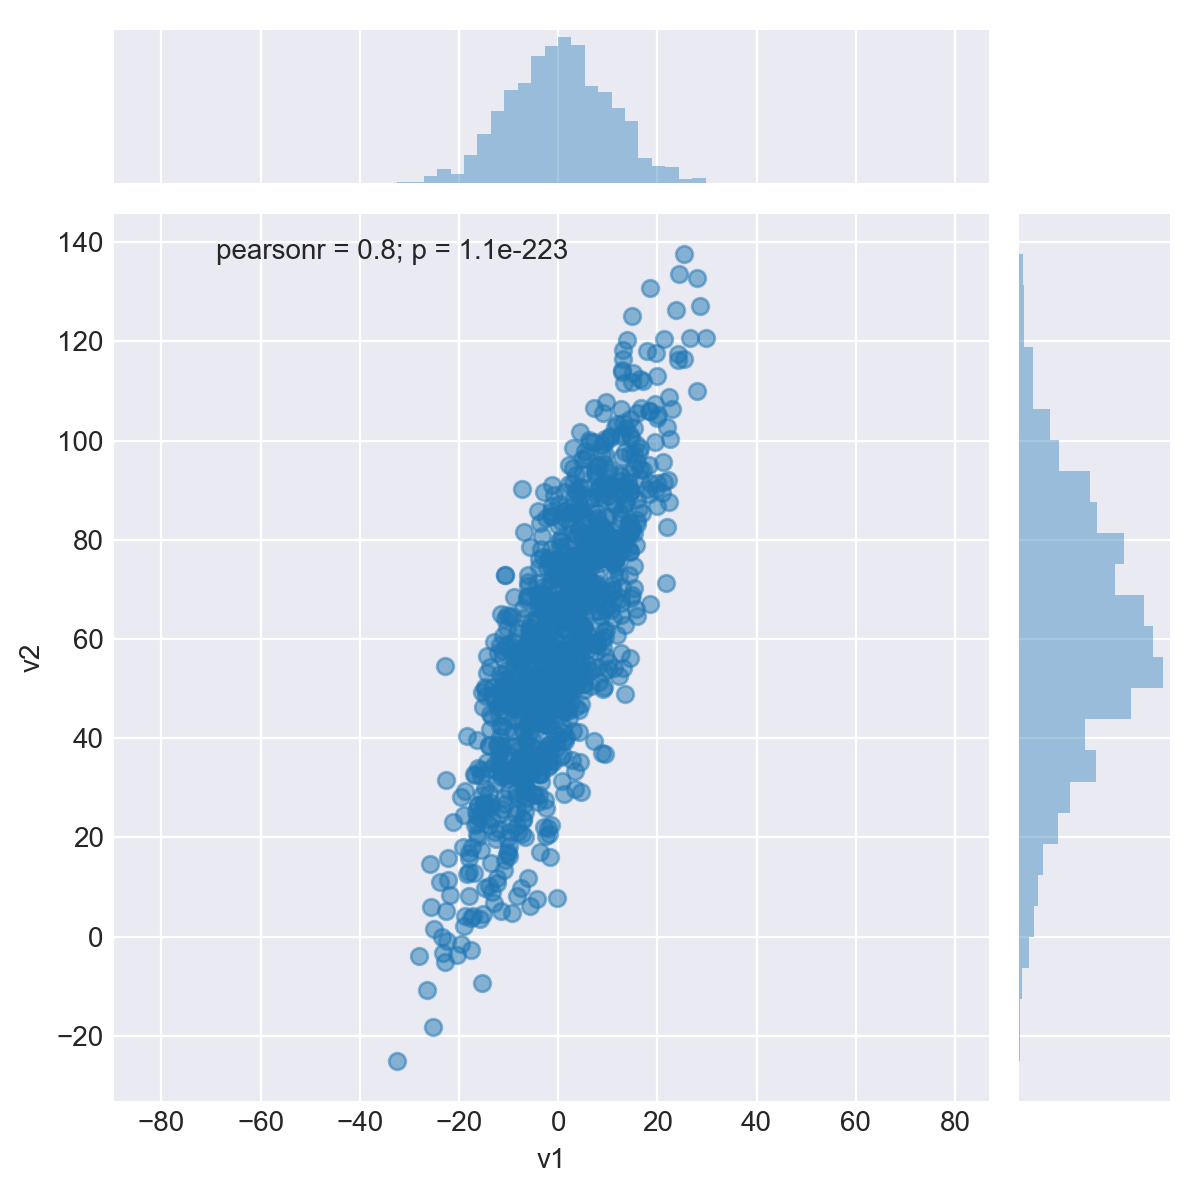

In [73]:
gd = sns.jointplot(x,y,alpha = 0.5) # alpha allows seeing where the scatter is really dense

#### Modification to sns plots using returned axis or figure or seaborn grid objects. 
Seaborn plots could return one or more of the axis/figure/seaborn grid objects , so some of the artists 
can be modified using these

In [74]:
type(gd)

seaborn.axisgrid.JointGrid

In [78]:
gd.ax_joint.set_aspect('equal')

### Hexbinplots 
- are useful when data size is huge, you won't be able to viualize scatter plot in understanding 
  which areas are most dense from others 

<IPython.core.display.Javascript object>


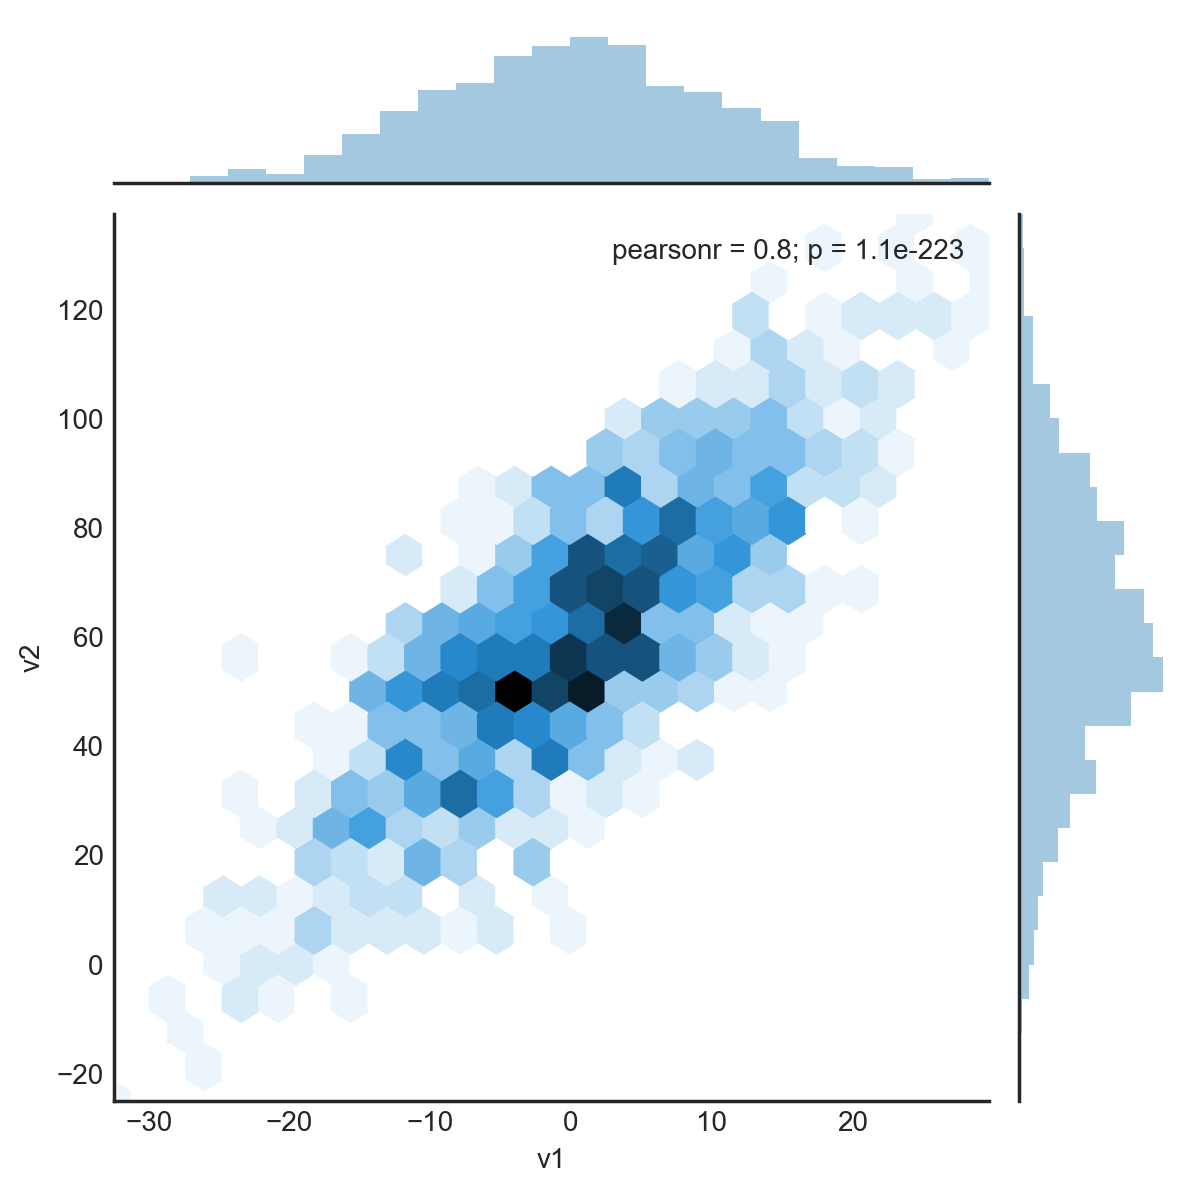

In [85]:
sns.jointplot(x,y,kind= 'hex')

### 2-D kernel density plots

<IPython.core.display.Javascript object>


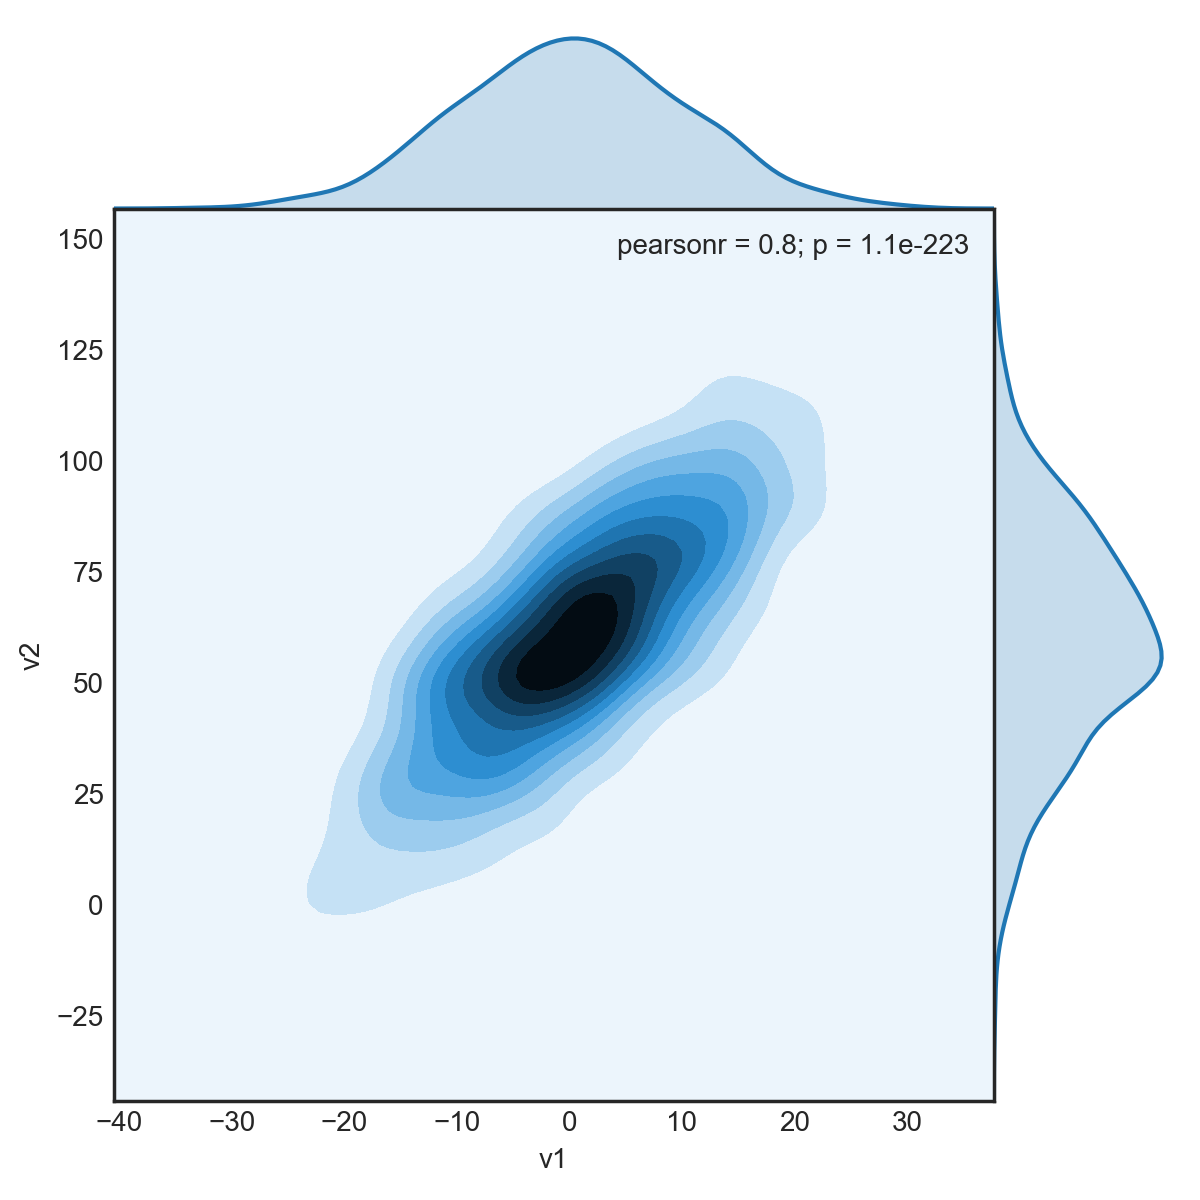

In [97]:
sns.set_style('white')
sns.jointplot(x,y,kind= 'kde', space = 0) # space controls how far the marginal plots are drawn

### Pairplots  
- Like scattermatrix plots in pandas

#### draw pairplots, with diagonals as kde instead of histograms, and mapping a categoricalvariable to color  
- for some reason kde does not take the colors to density plots ( this might be something 
  specific to this version of seaborn)

In [130]:
sns.__version__

'0.8.0'

In [127]:
df = sns.load_dataset('iris')

In [125]:
sns.pairplot?

<IPython.core.display.Javascript object>


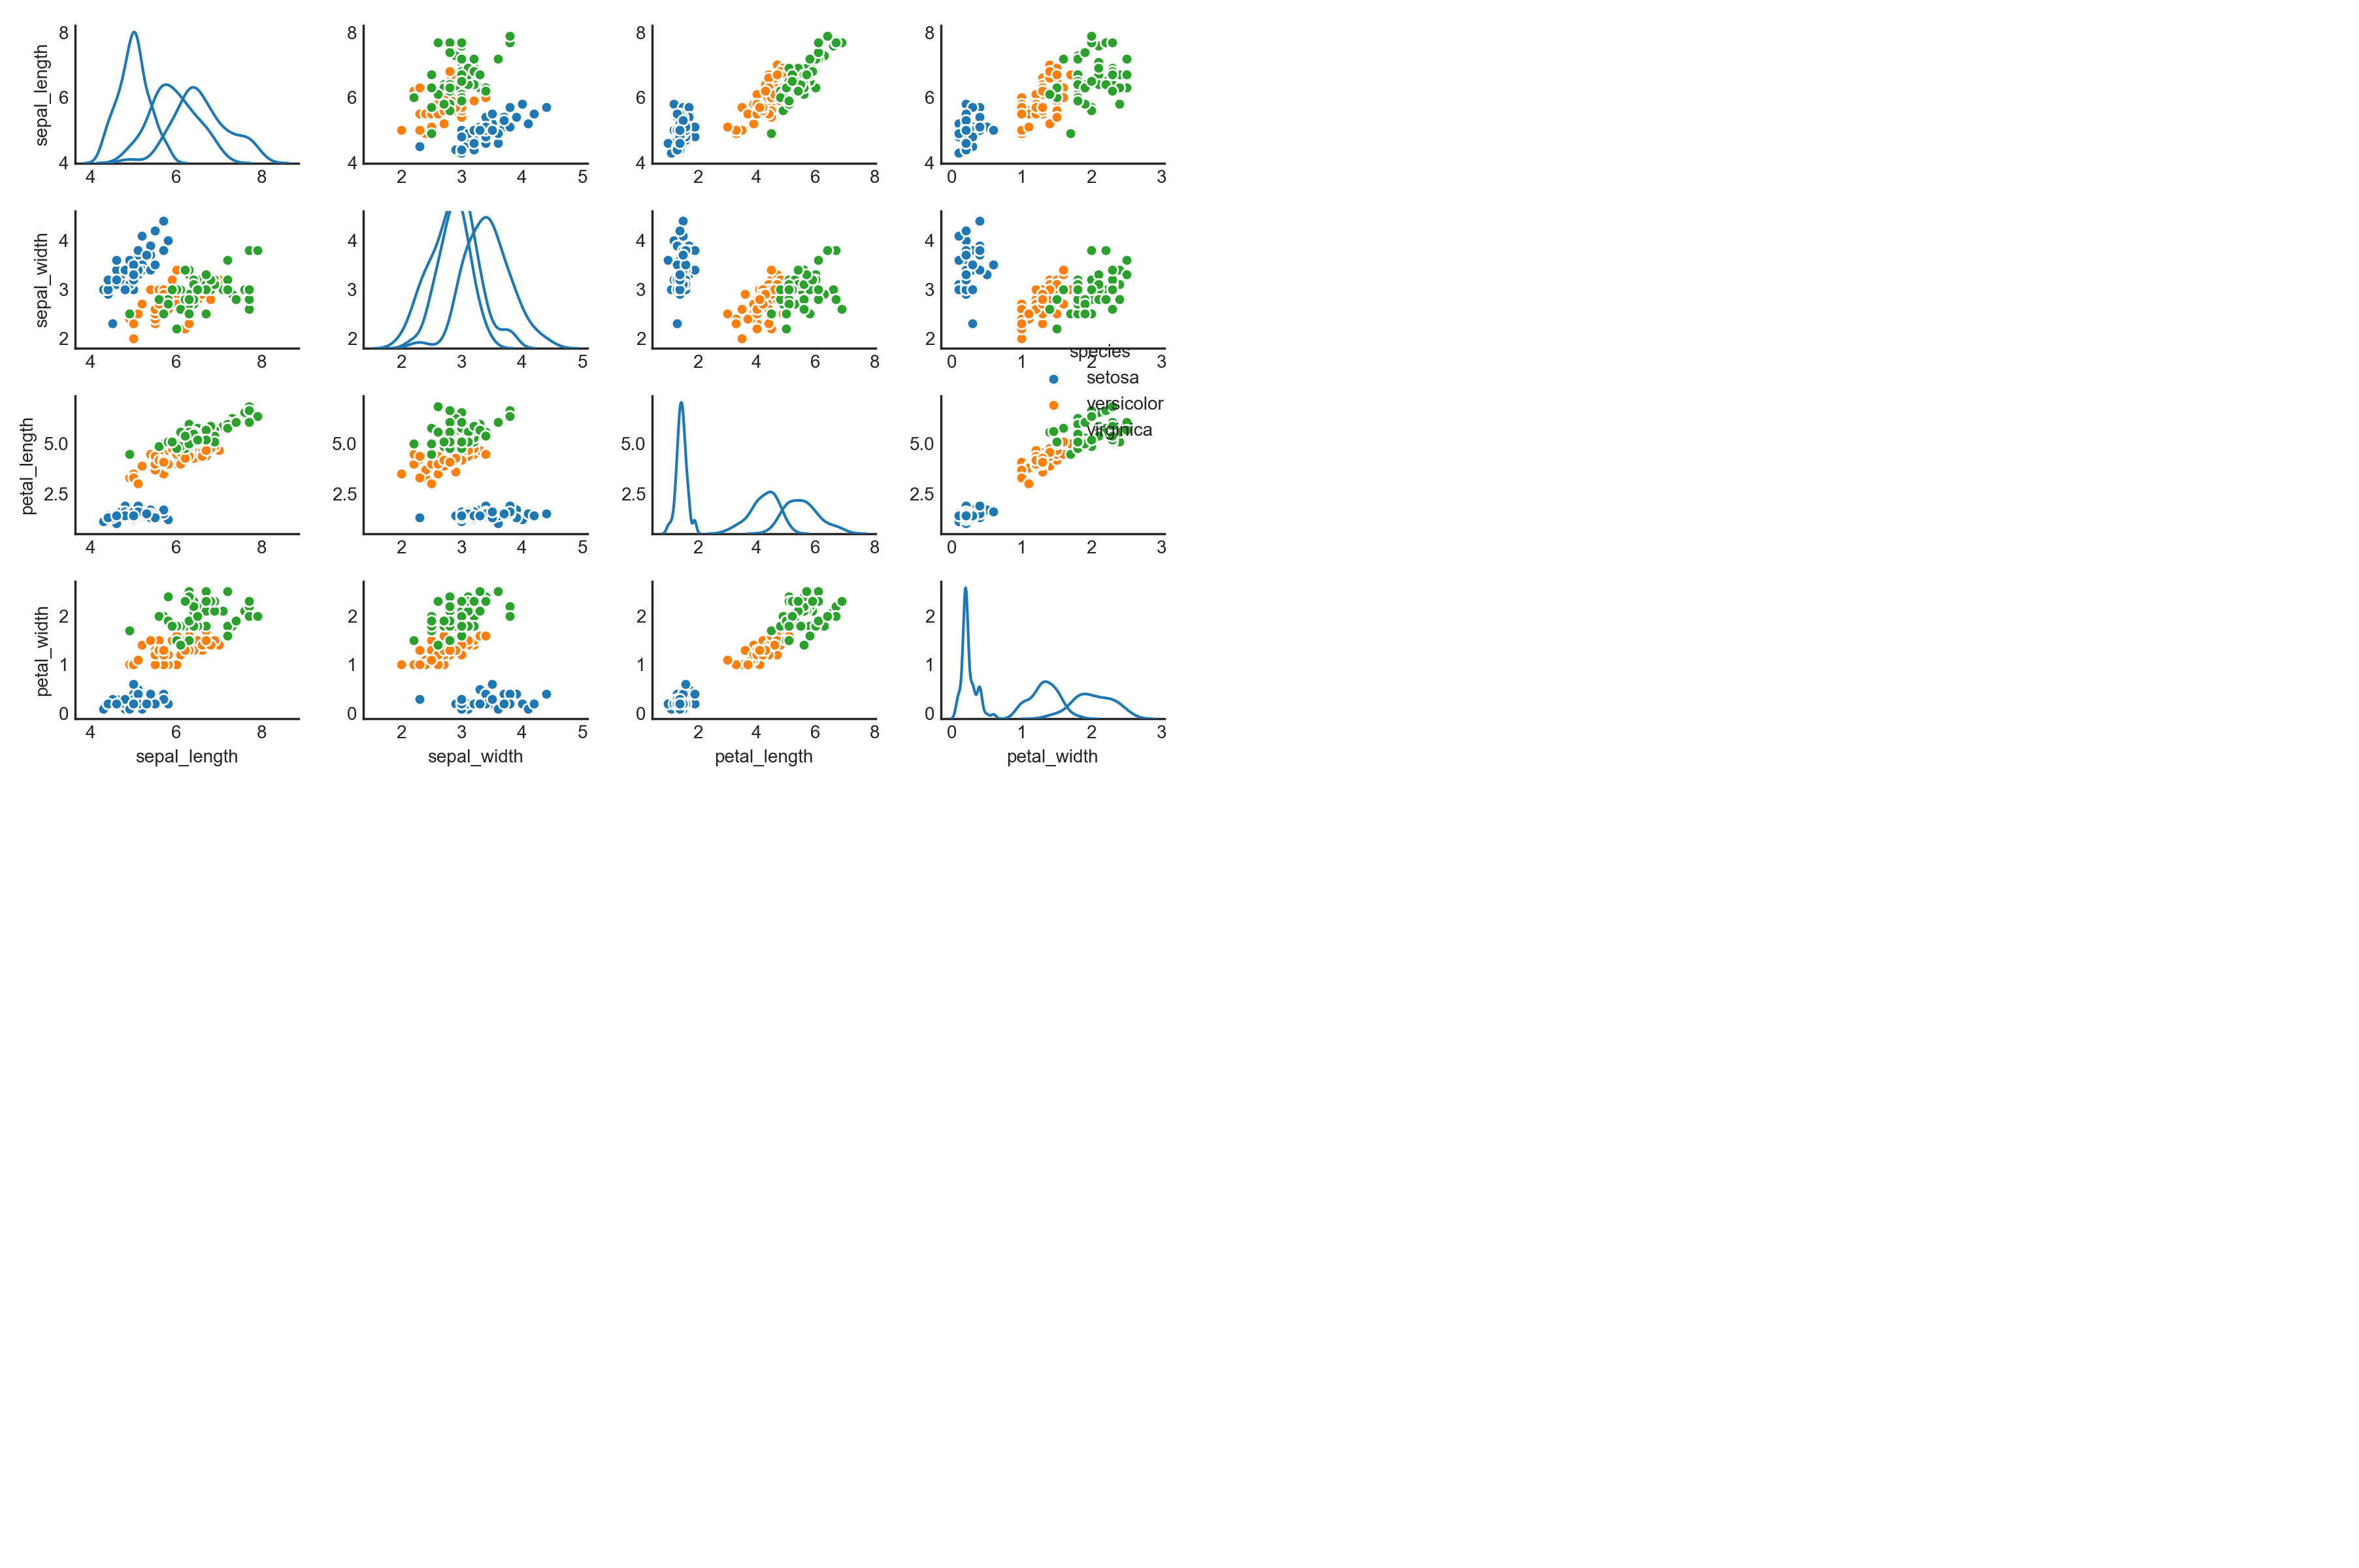

In [129]:
#plt.figure(figsize= (6,4))
# size controls height in inches
# aspect controls width in inches
pt = sns.pairplot(data= df, hue= 'species',diag_kind= 'kde', size = 1.5, aspect = 1.5)

#### Swarm plots, Violin Plots 
-  Swarm plot and Violin plots 
  - Violin plot are similar to box plots but convey more information, like modality of distribution. 
    They are formed by drawing density plots around the boxplot
  - Swarmplots are close to violin plots, they dnt have freq. representation arounf a box plot 

<IPython.core.display.Javascript object>


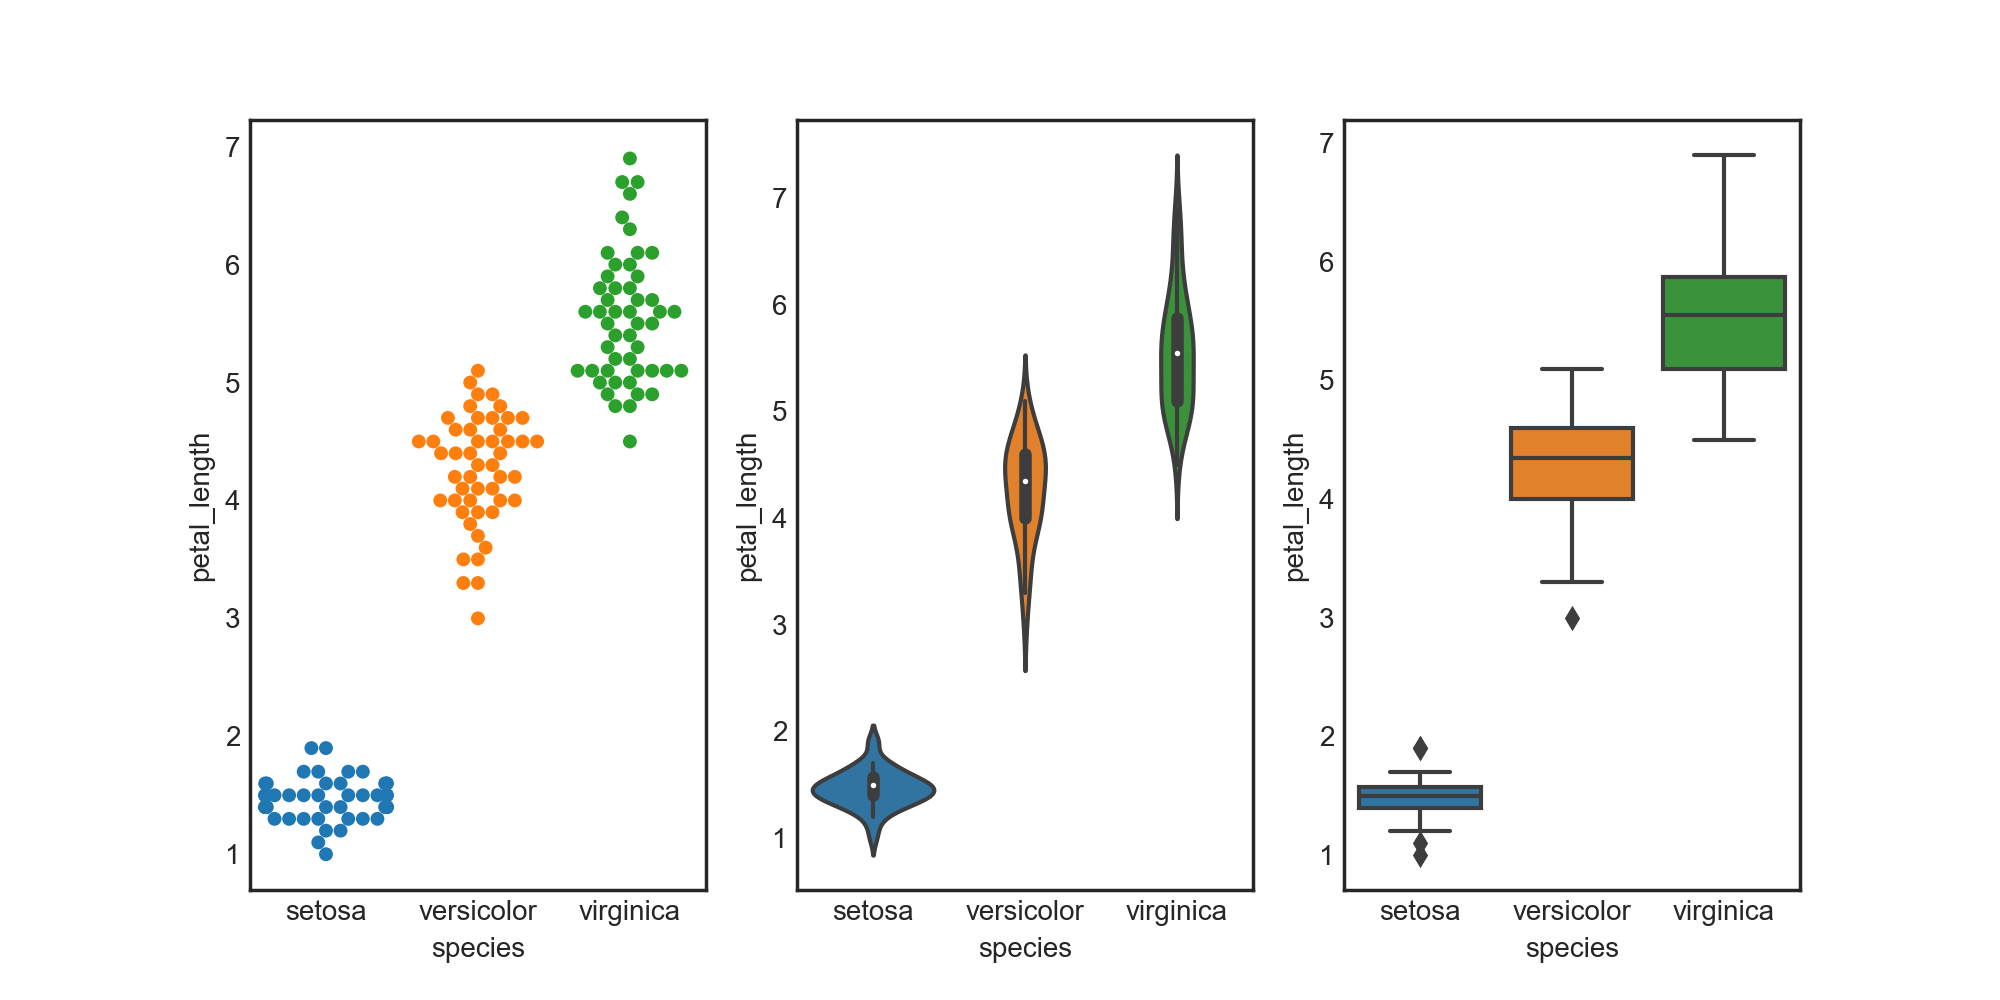

In [142]:
plt.figure(figsize= (10,5))
plt.subplot(1,3,1)
sns.swarmplot(data= df, x= 'species', y = 'petal_length')
plt.subplot(1,3,2)
sns.violinplot(data= df, x= 'species', y = 'petal_length')
plt.subplot(1,3,3)
sns.boxplot(data= df, x= 'species', y = 'petal_length')